In [25]:
from sklearn.mixture import GaussianMixture
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [ ]:
#%cd ..

/content/drive/My Drive/GitHub/master-thesis


# Import Data

In [ ]:
df = pd.read_csv('data/preprocessing/220216_preprocessed_data_missing_data.csv')
df.head()

,gender,postnr,region,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,...,Q14_ocupation_employee_private,Q14_ocupation_unemployed,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum
0,Man,2830,Capital,4.796778,5.0,7.0,4.0,7.0,4.0,5.0,...,0,0,1,0,0,0,2.0,4.0,4.0,2.0
1,Woman,4654,Zealand,7.000000,7.0,7.0,5.0,7.0,6.0,5.0,...,0,0,1,0,0,0,2.0,4.0,2.0,4.0
2,Woman,7451,Central,7.000000,7.0,7.0,7.0,7.0,4.0,3.0,...,0,0,1,0,0,0,NaN,NaN,NaN,NaN
3,Man,4700,Zealand,6.000000,1.0,7.0,2.0,1.0,7.0,4.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,Man,4000,Zealand,5.000000,1.0,1.0,2.0,1.0,2.0,2.0,...,0,0,0,0,0,1,2.0,4.0,NaN,NaN


## Extract non behavioural columns

In [ ]:
 # 'Timings_yyyymmdd','timestamp',
non_behaviour_cols = ['gender','postnr', 'region',  'season','Q10_education', 'Q11_nr_members_household',
 'Q12_nr_children_household','age_num', 'Q14_ocupation_pensioner',
 'Q14_ocupation_employee_private',
 'Q14_ocupation_unemployed',
 'Q14_ocupation_employee_public',
 'Q14_ocupation_self_employed',
 'Q14_ocupation_student',
 'Q14_ocupation_other',
 'Q15_economic_spectrum',
 'Q15_social_spectrum',
 'Q16_economic_spectrum',
 'Q16_social_spectrum',

 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2020NovNy4', 'date']

In [ ]:
behaviour_cols = df.columns.tolist()
for element in non_behaviour_cols:
    if element in behaviour_cols:
        behaviour_cols.remove(element)

## Extract nr contact columns

In [ ]:
nr_contacts = ['Q4_1_nr_contact_nonhouse_family', 'Q4_2_nr_contact_colleagues',
               'Q4_3_nr_contact_friends', 'Q4_4_nr_contact_strangers']

for element in nr_contacts:
    if element in behaviour_cols:
        behaviour_cols.remove(element)

behaviour_cols

['Q1_2_covid_is_threat',
 'Q2_1_easy_to_follow_advice',
 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3_if_follow_advice_safe',
 'Q2_4_if_follow_advice_others_safe',
 'Q2_5_follow_advice_relationships_impared',
 'Q2_6_follow_advice_life_degraded',
 'Q3_1_aware_hand_hygiene',
 'Q3_2_avoid_contact',
 'Q3_3_ensure_frequent_cleaning',
 'Q3_4_avoid_risk_groups',
 'Q3_5_keep_distance',
 'Q3_6_avoid_crowds',
 'Q3_7_minimize_activities_w_contact',
 'Q5_4_yourself_kept_distance',
 'Q5_5_feel_urge_scold',
 'Q6_2_advices_important',
 'Q6_3_others_can_avoid_spreading',
 'Q6_5_ownership_of_advice',
 'Q6_6_clear_information_on_advice_reason',
 'Q6_7_advice_limits_daily_activities',
 'Q6_9_trust_political_strategy',
 'Ny1_nr_times_wearing_masks_last_week']

## Use PCA Data

In [8]:
df = pd.read_csv('data/preprocessing/dim_reduction/220321_pca_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,Q7_1_last_week_fever,Q7_2_last_week_cough,Q7_3_last_week_sore_throat,Q7_4_last_week_no_smell_taste,Q7_5_last_week_shortness_breath,Q2020NovNy1,Q2020NovNy2_tested_positive,Q2020NovNy3,Q2020NovNy4,Ny1_nr_times_wearing_masks_last_week
0,-0.639591,-0.162702,-0.711649,0.720878,-0.681940,1.254401,0.383294,0.650458,1.067924,0.512884,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,4.0
1,-1.132418,-0.192777,-0.379158,-0.150098,-0.375834,0.564165,-1.388443,0.407469,-1.490331,1.622040,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2,-1.035513,0.283440,0.355890,-0.341522,1.302738,-0.452865,0.525508,-1.529978,-1.869227,0.232083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
3,0.169676,-1.796129,0.845639,1.852579,0.768380,-1.558062,0.143525,-0.367936,-1.824915,1.282615,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,4.0
4,2.091070,-2.752190,2.938180,-0.213405,1.164145,1.317973,0.524366,-0.984538,-1.028091,-1.114620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0


In [9]:
answers_raw = df.iloc[:,:12].to_numpy()

## Scale Answers

In [ ]:
#answers_raw = df[behaviour_cols].to_numpy()

In [ ]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(answers_raw)
answers = scaler.transform(answers_raw)"""

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(answers_raw)\nanswers = scaler.transform(answers_raw)'

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(answers_raw)
answers = scaler.transform(answers_raw)

In [11]:
answers_sampled = pd.DataFrame(answers).sample(10000).to_numpy()

# GM clustering

## Elbow approach to determine ideal amount of clusters

In [ ]:
# Set up a range of cluster numbers to try
n_range = range(2,15)

# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in tqdm(n_range):
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=6)
    gm.fit(answers_sampled)
    cluster_labels = gm.predict(answers_sampled)
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(answers_sampled))
    aic_score.append(gm.aic(answers_sampled))

100%|██████████| 13/13 [02:51<00:00, 13.18s/it]


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

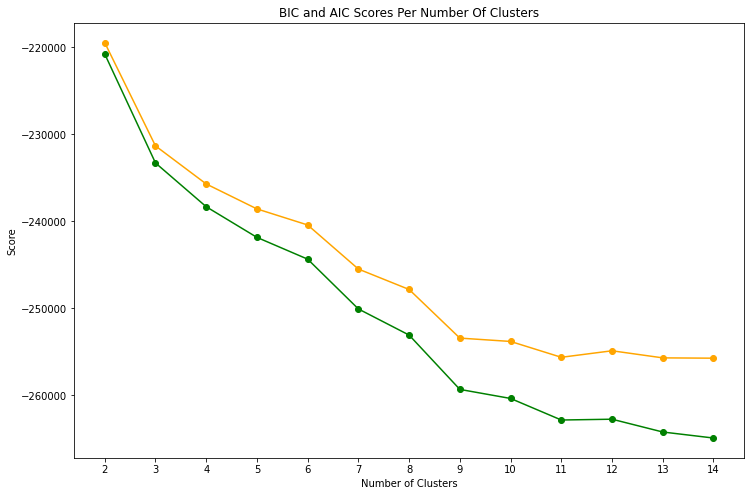

In [ ]:
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

## Probabilistic Approach to determine number of clusters

In [32]:
from scipy.stats import norm
mean = 2
std = 3
prior_dist = norm(loc=mean, scale=std)

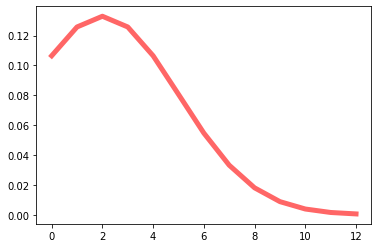

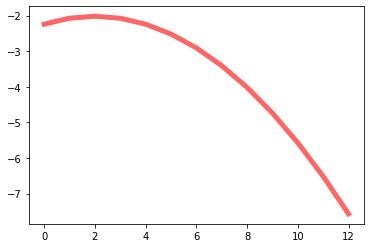

In [38]:
x = np.arange(13)
plt.plot(x, prior_dist.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
plt.show()
plt.plot(x, prior_dist.logpdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
plt.show()

In [39]:
# Set up a range of cluster numbers to try
n_range = range(2,15)
list_log_prob_data_given_model = []
list_log_prob_model = []
list_score = []

# Loop through the range and fit a model
for n in tqdm(n_range):
    # init & fit gmm
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=6)
    gm.fit(answers_sampled)
    
    # Calculate Log Probabilities
    log_prob_data_given_model = gm.score(answers_sampled) # Computes the per-sample average log-likelihood of the given data X
    log_prob_model = prior_dist.logpdf(n)
    score = log_prob_data_given_model + log_prob_model

    # Append values to list
    list_log_prob_data_given_model.append(log_prob_data_given_model)
    list_log_prob_model.append(log_prob_model)
    list_score.append(score)



100%|██████████| 13/13 [02:57<00:00, 13.62s/it]


Text(0.5, 1.0, 'Probabilistic Evaluation')

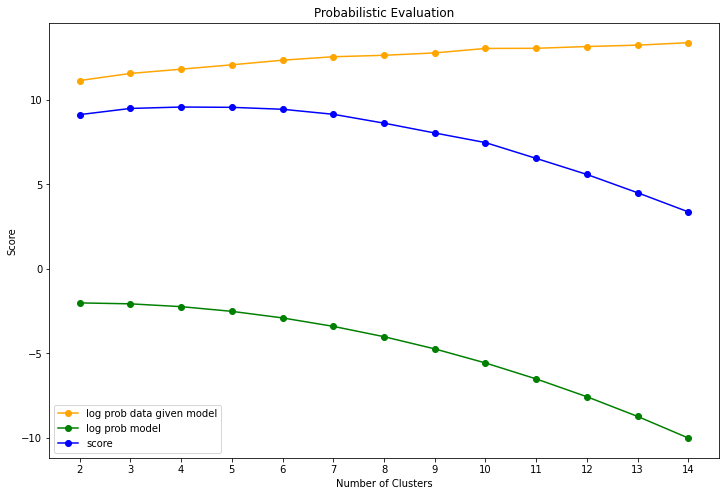

In [40]:
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, list_log_prob_data_given_model, '-o', color='orange', label='log prob data given model')
ax.plot(n_range, list_log_prob_model, '-o', color='green', label='log prob model')
ax.plot(n_range, list_score, '-o', color='blue', label='score')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.legend()
ax.set_title('Probabilistic Evaluation')

In [43]:
list_score

[9.128642481927521,
 9.494738021985173,
 9.578866298602147,
 9.560279544271282,
 9.445887703168122,
 9.148938645559028,
 8.623877964232914,
 8.042904920068978,
 7.473695552842977,
 6.537496500498059,
 5.587439620395785,
 4.50316503331144,
 3.3701699038360893]

In [46]:
n_clusters = n_range[np.argmax(list_score)]
n_clusters

4

## GM fit

In [ ]:
n_clusters = 3
gm = GaussianMixture(n_components=n_clusters, 
                         random_state=123, 
                         n_init=6)
gm.fit(answers)

GaussianMixture(n_components=3, n_init=6, random_state=123)

In [18]:
df['group'] = gm.predict(answers)
df['group_prob'] = pd.DataFrame(gm.predict_proba(answers)).max(axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,Q7_3_last_week_sore_throat,Q7_4_last_week_no_smell_taste,Q7_5_last_week_shortness_breath,Q2020NovNy1,Q2020NovNy2_tested_positive,Q2020NovNy3,Q2020NovNy4,Ny1_nr_times_wearing_masks_last_week,group,group_prob
0,-0.639591,-0.162702,-0.711649,0.720878,-0.681940,1.254401,0.383294,0.650458,1.067924,0.512884,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,4.0,0,0.851829
1,-1.132418,-0.192777,-0.379158,-0.150098,-0.375834,0.564165,-1.388443,0.407469,-1.490331,1.622040,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,0.985445
2,-1.035513,0.283440,0.355890,-0.341522,1.302738,-0.452865,0.525508,-1.529978,-1.869227,0.232083,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2,1.000000
3,0.169676,-1.796129,0.845639,1.852579,0.768380,-1.558062,0.143525,-0.367936,-1.824915,1.282615,...,0.0,0.0,0.0,NaN,NaN,0.0,NaN,4.0,0,0.987530
4,2.091070,-2.752190,2.938180,-0.213405,1.164145,1.317973,0.524366,-0.984538,-1.028091,-1.114620,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,2,0.998507


In [19]:
df['group'].value_counts(dropna=False)

2    67483
0    38528
1    16818
Name: group, dtype: int64

In [16]:
gm.weights_

array([0.59149305, 0.40850695])

## Group Probability

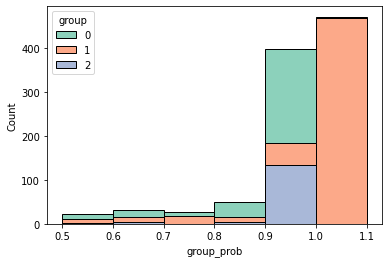

In [ ]:
df_sample = df.sample(1000)
sns.histplot(data=df_sample, multiple='stack', x="group_prob", hue="group", log_scale=(False, False), binwidth=0.1, palette='Set2')
plt.show()

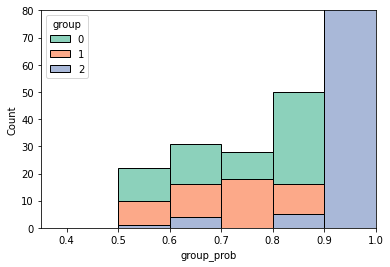

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=df_sample, ax=ax, multiple='stack', x="group_prob", hue="group", log_scale=(False, False), binwidth=0.1, palette='Set2')
ax.set_xlim(0.35, 1)
ax.set_ylim(0,80)
plt.show()

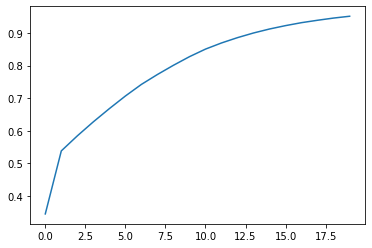

In [ ]:
prob_list = []
for i in np.arange(0, 0.2, 0.01):
  prob = df['group_prob'].quantile(i)
  prob_list.append(prob)

plt.plot(prob_list)
plt.show()

In [ ]:
# Drop columns with low group/cluster probability
df = df[df['group_prob'] > 0.55]
df.shape

(121326, 44)

# Analysis

## Filter and plot interesting columns

In [ ]:
df_questions = pd.DataFrame(gm.means_.T)
#df_questions['behaviour_cols'] = behaviour_cols
df_questions['std'] = df_questions.std(axis=1)

df_questions.sort_values(by='std', ascending=False)

,0,1,2,std
0,0.181801,0.329950,0.075843,0.127636
1,0.437264,0.525864,0.527481,0.051627
11,0.442432,0.475678,0.458450,0.016627
2,0.449067,0.427639,0.423265,0.013808
3,0.488095,0.495218,0.470031,0.012984
7,0.505101,0.492292,0.484426,0.010435
4,0.436893,0.445671,0.425895,0.009909
5,0.482836,0.485533,0.474443,0.005784
10,0.493181,0.500652,0.503854,0.005477
9,0.468130,0.478105,0.470398,0.005229


In [ ]:
top_3_cols = df_questions.sort_values(by='std', ascending=False).index[:3].tolist()#.iloc[:3].tolist()
for i in range(len(top_3_cols)):
  top_3_cols[i] = str(top_3_cols[i])
top_3_cols

['0', '1', '11']

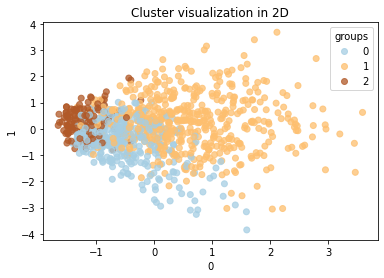

In [ ]:
df_sample = df.sample(1000)
scatter = plt.scatter(df_sample[top_3_cols[0]], df_sample[top_3_cols[1]], c=df_sample['group'], cmap='Paired', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], title="groups", labels=[0,1,2,3,4,5,6])
plt.xlabel(top_3_cols[0])
plt.ylabel(top_3_cols[1])
plt.title('Cluster visualization in 2D')
plt.show()

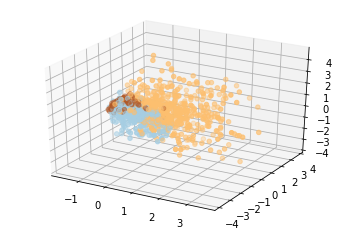

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_sample[top_3_cols[0]], df_sample[top_3_cols[1]], df_sample[top_3_cols[2]], c=df_sample['group'], cmap='Paired')

## Groups Daily Distribution

In [ ]:
column = '0'
groups_percentage = df.groupby(['date','group'],as_index=False)[column].count()
groups_percentage

,date,group,0
0,2020-05-29,0,17
1,2020-05-29,1,27
2,2020-05-29,2,9
3,2020-05-30,0,101
4,2020-05-30,1,148
...,...,...,...
1651,2021-11-30,1,88
1652,2021-11-30,2,22
1653,2021-12-01,0,41
1654,2021-12-01,1,92


In [ ]:
def normalize(row):
  sum = groups_percentage[groups_percentage['date']==row['date']][column].sum()
  return row[column]/sum

groups_percentage['percentage'] = groups_percentage.apply(lambda x: normalize(x), axis=1)
groups_percentage.drop(columns=column,inplace=True)
groups_percentage

,date,group,percentage
0,2020-05-29,0,0.320755
1,2020-05-29,1,0.509434
2,2020-05-29,2,0.169811
3,2020-05-30,0,0.342373
4,2020-05-30,1,0.501695
...,...,...,...
1651,2021-11-30,1,0.647059
1652,2021-11-30,2,0.161765
1653,2021-12-01,0,0.280822
1654,2021-12-01,1,0.630137


In [ ]:
groups_rolling = groups_percentage.groupby('group').rolling(7).mean().reset_index()
groups_rolling = pd.merge(groups_rolling, groups_percentage[['date']], how='left', left_on='level_1', right_index=True)
groups_rolling.head()

,group,level_1,percentage,date
0,0,0,NaN,2020-05-29
1,0,3,NaN,2020-05-30
2,0,6,NaN,2020-05-31
3,0,9,NaN,2020-06-01
4,0,12,NaN,2020-06-02


In [ ]:
fig = px.line(groups_rolling, x="date", y="percentage", color='group', title='Group daily distribution')
fig.show()

In [ ]:
#Save for model prediction
#groups_percentage[groups_percentage.group == 1][['date','percentage']].to_csv("data/clustering/220309_percentage_non_careful.csv")